<a href="https://colab.research.google.com/github/PrerakPro7/BAIN-24/blob/main/A1_220818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

In [ ]:
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial, beta distributions
import preliz as pz # defining priors
from cycler import cycler
import math

Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


In [ ]:
def P(S, A): # A = event , S = sample space
    if set(A).issubset(set(S)): # set A is an event
        return len(A)/len(S)
    else:
        return 0

In [ ]:
S=["strawberry1", "strawberry2", "blueberry", "cinnamon"]
A=["strawberry1", "strawberry2"]
B=["strawberry1", "strawberry2","blueberry"]
print("Sample Space:",S);

Sample Space: ['strawberry1', 'strawberry2', 'blueberry', 'cinnamon']


In [ ]:
print("P(A)=",P(S,A))
print("P(B)=",P(S,B))

P(A)= 0.5
P(B)= 0.75


Since intersection of A and B is not empty, there are not mutually exclusive.

 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [ ]:
probabilities = [0.1, 0.2, 0.4, 0.3] #assuming probability is not equally likely

In [ ]:
def P1(S, events, probabilities): # A = event , S = sample space, P = probabilities
    if set(events).issubset(set(S)): # set A is an event
        probability_dict = dict(zip(S, probabilities))
        total_probability=0
        for event in events:
          total_probability += probability_dict.get(event, 0)
        return total_probability
    else:
        return 0

In [ ]:
print("P(A)=",P1(S,A,probabilities))
print("P(B)=",P1(S,B,probabilities))

P(A)= 0.30000000000000004
P(B)= 0.7000000000000001


Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

<Axes: >

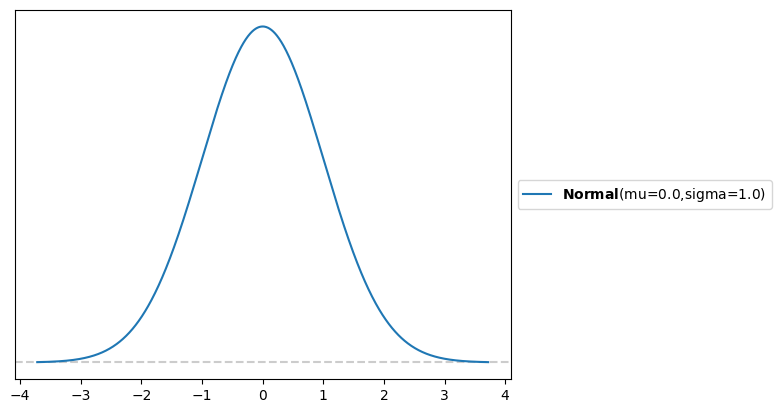

In [ ]:
pz.Normal(0,1).plot_pdf()

<Axes: >

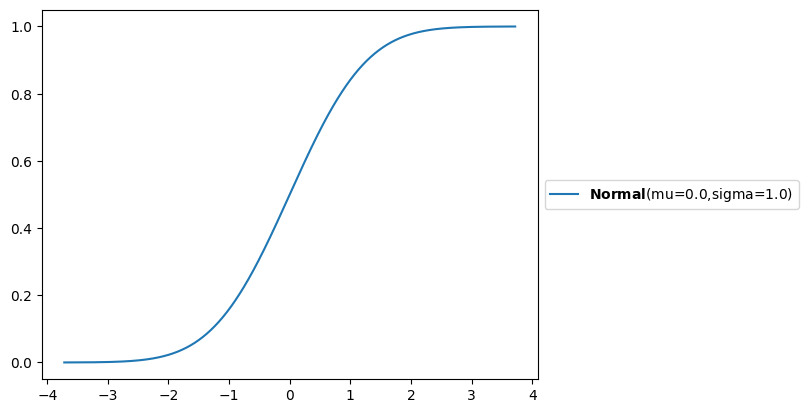

In [ ]:
pz.Normal(0,1).plot_cdf()

interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

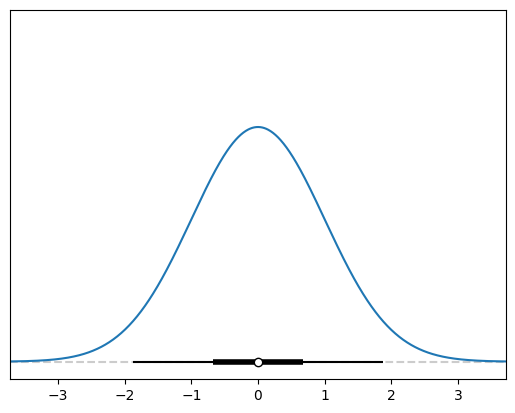

In [ ]:
pz.Normal(0,1).plot_interactive()

<Axes: >

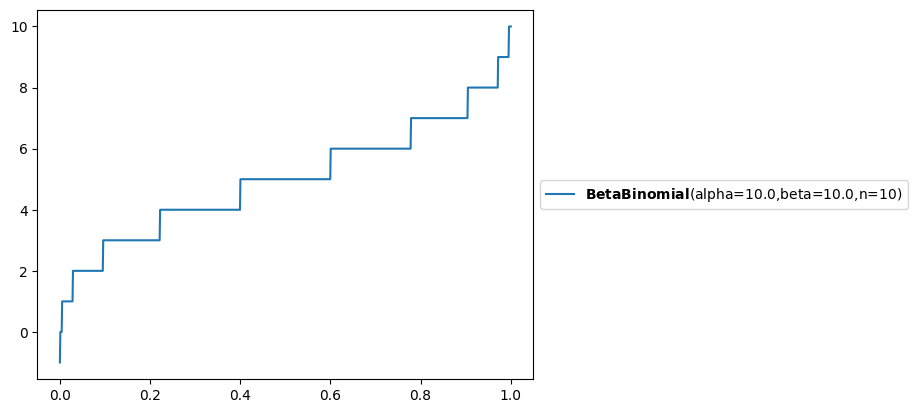

In [ ]:
pz.BetaBinomial(alpha=10, beta=10, n=10).plot_ppf()

<Axes: >

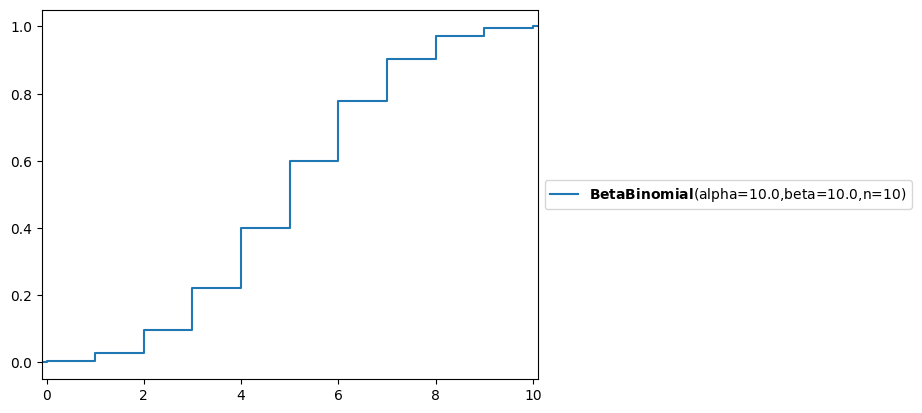

In [ ]:
pz.BetaBinomial(alpha=10, beta=10, n=10).plot_cdf()

<Axes: >

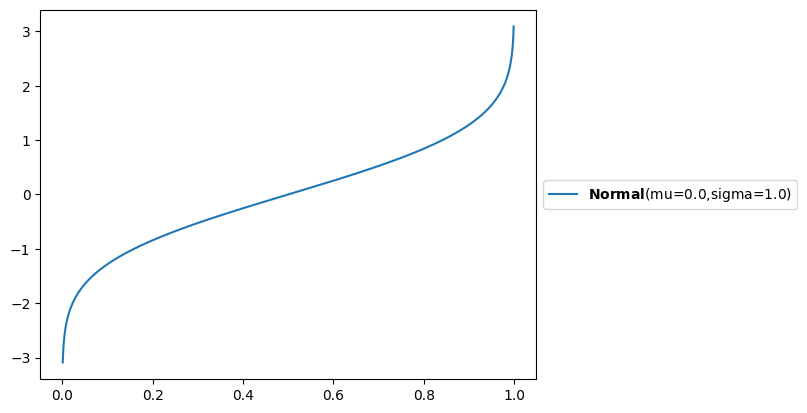

In [ ]:
pz.Normal(0, 1).plot_ppf()

We observe that plot_ppf() and plot_cdf() are inverse of each other in case of discrete random variables.The plot_ppf() function returns the value of random variable whose probability is less than x, whereas the plot_cdf() returns the probability of random variable less than equal to x, thus they are inverse of each other.

Similarly, we observe that plot_ppf() and plot_cdf() are inverse of each other in case of continuous random variables.



Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

<Axes: >

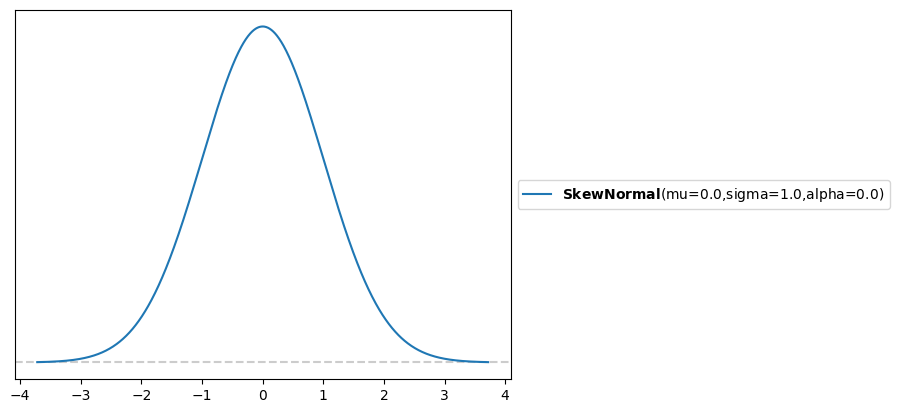

In [ ]:
pz.SkewNormal(0, 1, 0).plot_pdf()

Since alpha define the shape parameter, therefore when alpha=0, we get the normal Gaussian distribution.

<Axes: >

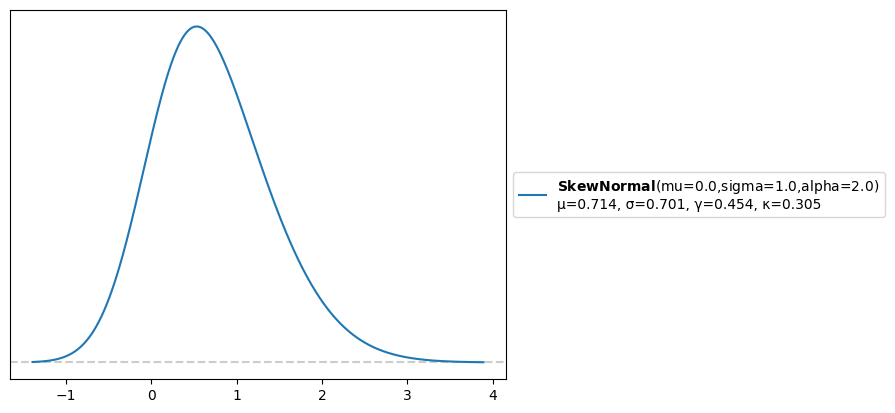

In [ ]:
pz.SkewNormal(0, 1, 2).plot_pdf(moments=["m", "d", "s", "k"])

<Axes: >

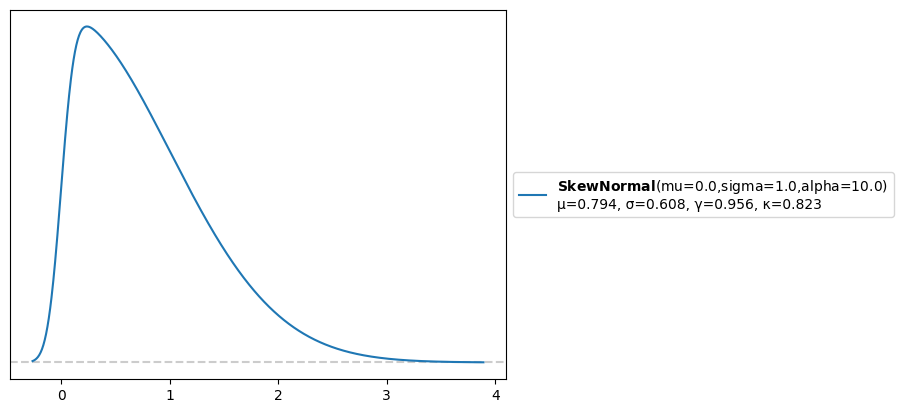

In [ ]:
pz.SkewNormal(0, 1, 10).plot_pdf(moments=["m", "d", "s", "k"])

<Axes: >

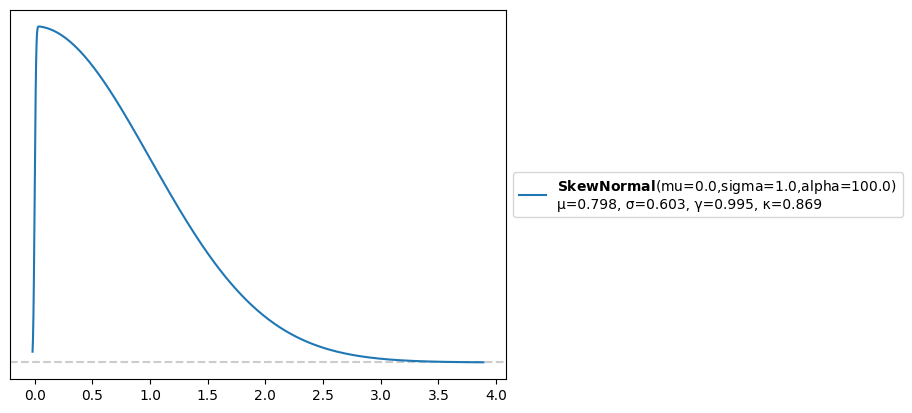

In [ ]:
pz.SkewNormal(0, 1, 100).plot_pdf(moments=["m", "d", "s", "k"])

As we increase the value of alpha, the skewness of the curve also increases. At alpha=100, we observe an almost vertical line, indicating a greater extent of skewness.

<Axes: >

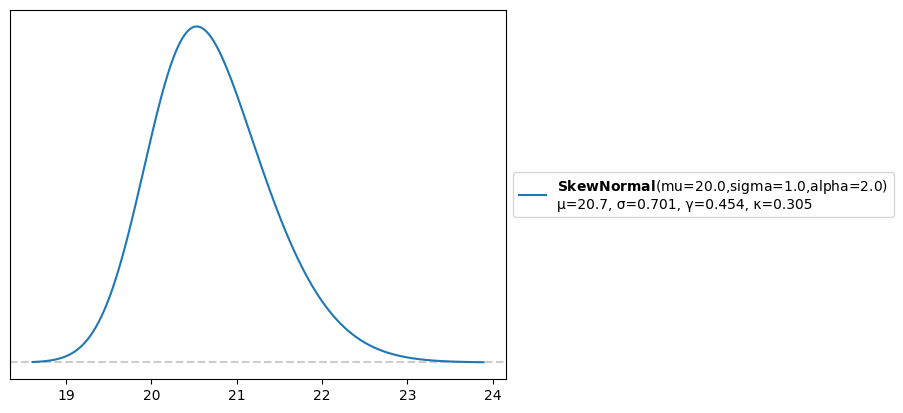

In [ ]:
pz.SkewNormal(20, 1, 2).plot_pdf(moments=["m", "d", "s", "k"])

Since *mu* is our location parameter, changing the value of *mu* shifts the graph of skew-normal distribution around the x-axis.

In [ ]:
dist = pz.SkewNormal(0, 1, 2)

In [ ]:
def sample_moments(size):
  samples = dist.rvs(size)
  sample_mean = np.mean(samples)
  sample_variance = np.var(samples)
  return sample_mean, sample_variance

In [ ]:
sample_sizes = [10, 100, 1000]

In [ ]:
for size in sample_sizes:
    mean, variance = sample_moments(size)
    print(f"Sample Size: {size}")
    print(f"Sample Mean: {mean}")
    print(f"Sample Variance: {variance}\n")

Sample Size: 10
Sample Mean: 0.5907460393035074
Sample Variance: 0.756255838272496

Sample Size: 100
Sample Mean: 0.7076713592046602
Sample Variance: 0.47073580058854647

Sample Size: 1000
Sample Mean: 0.7239539915255794
Sample Variance: 0.49628852787748234



Theoritical mean for Skew-Normal(0,1,2)=0.714

Theoritical variance for Skew-Normal(0,1,2)= 0.701

We observe that the values of mean and variance approach towards the theoritical values of mean and variance in the skew normal distribution as we increase the size of skew-normal distribution.